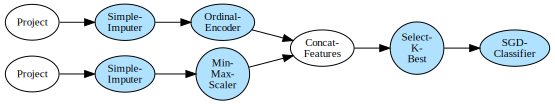

In [3]:
from lale.lib.rasl import SimpleImputer
from lale.lib.rasl import OrdinalEncoder, HashingEncoder
from lale.lib.rasl import MinMaxScaler
from lale.lib.rasl import SelectKBest
from lale.lib.sklearn import RandomForestClassifier, RandomForestRegressor, SGDClassifier
from lale.lib.lale import ConcatFeatures
from lale.lib.lale import Project, categorical

cat_columns = []
num_columns = []

cat_prep = (Project(columns=cat_columns) >> SimpleImputer(strategy="constant")
        >>OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
num_prep = (Project(columns=num_columns)
    >> SimpleImputer(strategy="mean")
    >> MinMaxScaler())
pipeline = (cat_prep & num_prep) >> ConcatFeatures()
pipeline = pipeline >> SelectKBest(k=10) >> SGDClassifier()

pipeline.visualize(ipython_display=True)



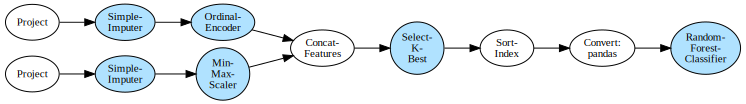

In [4]:
from lale.lib.rasl import Convert, SortIndex

cat_columns = []
num_columns = []

cat_prep = (Project(columns=cat_columns) >> SimpleImputer(strategy="constant")
        >>OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
num_prep = (Project(columns=num_columns)
    >> SimpleImputer(strategy="mean")
    >> MinMaxScaler())
pipeline = (cat_prep & num_prep) >> ConcatFeatures()
pipeline = pipeline >> SelectKBest(k=10) >> SortIndex() >> Convert() >> RandomForestClassifier()

pipeline.visualize(ipython_display=True)
